https://arxiv.org/pdf/1511.06434.pdf

http://bamos.github.io/2016/08/09/deep-completion/

http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from MyHelper import *

<img src="images/upsamp.png" width = "50%">

In [2]:
downloadData(filename,loc)

In [3]:
X,y=getData(filename,loc)

In [4]:
print(X.shape,y.shape)

(60000, 28, 28, 1) (60000, 10)


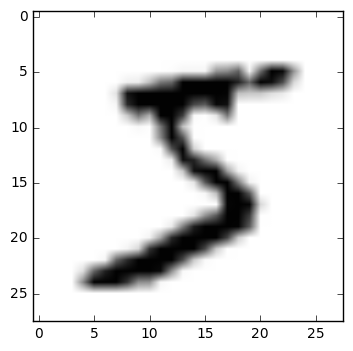

In [5]:
plt.imshow(X[0,:,:,0],cmap='Greys')

# Random distribution

In [6]:
def Z(n,batch_size):
    """
    Uniform random distribution
    
    Parameters
    -------------
    n : int
        size of the vector to return
    """
    return np.random.uniform(-1, 1, [batch_size,n])

In [7]:
n = 100
Z(n,batch_size=3).shape

(3, 100)

# Model

<img src="images/upsamp.png" width = "50%">

In [8]:
def createWeight(size):
    return tf.Variable(tf.truncated_normal(size, stddev=0.1))

def createBias(size):
    return tf.Variable(tf.constant(0.1,shape=size))

def lrelu(x, leak=0.2):
    f1 = 0.5 * (1 + leak)
    f2 = 0.5 * (1 - leak)
    return f1 * x + f2 * abs(x)

In [11]:
batch_size = 3
g = tf.Graph()
with g.as_default():
    u_input = tf.placeholder(tf.float32,shape=(batch_size,n))
    
    W_project = createWeight([n,4*4*1024])
    b_project = createBias([1,4*4*1024])
    
    W_conv1 = createWeight([4,4,512,1024])
    b_conv1 = createWeight([512])
    
    W_conv2 = createWeight([7,7,256,512])
    b_conv2 = createWeight([256])
    
    W_conv3 = createWeight([14,14,1,256])
    b_conv3 = createWeight([1])
    
    prjt = tf.matmul(u_input,W_project)+b_project
    h0 = lrelu(tf.reshape(prjt,shape=(batch_size,4,4,1024)))
    
    conv1 = tf.nn.conv2d_transpose(h0,W_conv1,output_shape=[batch_size,7,7,512],strides=[1,2,2,1])
    h1 = lrelu(conv1+b_conv1)
    
    conv2 = tf.nn.conv2d_transpose(h1,W_conv2,output_shape=[batch_size,14,14,256],strides=[1,2,2,1])
    h2 = lrelu(conv2+b_conv2)
    
    conv3 = tf.nn.conv2d_transpose(h2,W_conv3,output_shape=[batch_size,28,28,1],strides=[1,2,2,1])
    h3 = lrelu(conv3+b_conv3)
    
    init = tf.initialize_all_variables()

In [12]:
sess=tf.Session(graph=g)
sess.run(init)
fd = {u_input:Z(n,3)}
G = sess.run(h3,feed_dict=fd)

In [13]:
G.shape

(3, 28, 28, 1)

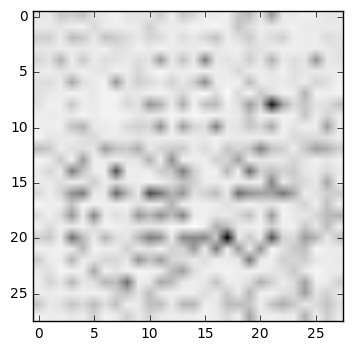

In [14]:
plt.imshow(G[2,:,:,0],cmap='Greys')